In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Dropout,InputLayer
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras import Input

In [3]:
tf.__version__

'2.6.0'

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
assert len(np.unique(y_train)) == len(np.unique(y_test))
assert X_train.shape[1:] == X_test.shape[1:]

In [6]:
num_classes = len(np.unique(y_train))
epochs = 50
batch_size = 32
lr = 0.0001

In [7]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
test_images = X_test[:5]
test_images.shape

(5, 28, 28)

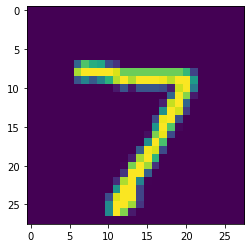

In [10]:
plt.imshow(test_images[0])

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test = X_test.astype('float32')
X_test /= 255

In [12]:
def createModel(input_shape,num_classes=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
     
    return model

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
model = createModel(X_train.shape[1:],10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [15]:
loss = 'categorical_crossentropy'
metrics=['accuracy']
model.compile(optimizer='adam',loss=loss,metrics=metrics)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
callbacks=[EarlyStopping(monitor='val_accuracy',patience=20),
          ModelCheckpoint('model_ex4.h5',save_best_only=True, mode='max')
          ]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.3,shuffle=True,random_state=12)

In [18]:
y_valid.shape

(18000, 10)

In [19]:
history = model.fit(X_train,y_train,
                    validation_data=(X_valid,y_valid),
                    epochs=50,callbacks=callbacks)

Epoch 1/50
1313/1313 [==============================] - 13s 7ms/step - loss: 0.3320 - accuracy: 0.8945 - val_loss: 0.0672 - val_accuracy: 0.9809
Epoch 2/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0957 - accuracy: 0.9733 - val_loss: 0.0502 - val_accuracy: 0.9856
Epoch 3/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0746 - accuracy: 0.9794 - val_loss: 0.0373 - val_accuracy: 0.9902
Epoch 4/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0643 - accuracy: 0.9825 - val_loss: 0.0389 - val_accuracy: 0.9894
Epoch 5/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0557 - accuracy: 0.9846 - val_loss: 0.0346 - val_accuracy: 0.9913
Epoch 6/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0490 - accuracy: 0.9864 - val_loss: 0.0344 - val_accuracy: 0.9908
Epoch 7/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0477 - accuracy: 0.9867 - val_loss: 0.0316 - val_accuracy

In [20]:
import pandas as pd
history_frame = pd.DataFrame(history.history)

<AxesSubplot:>

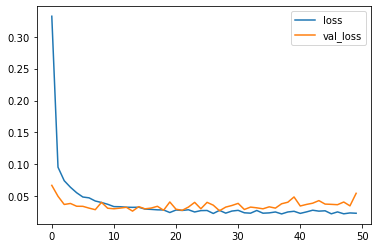

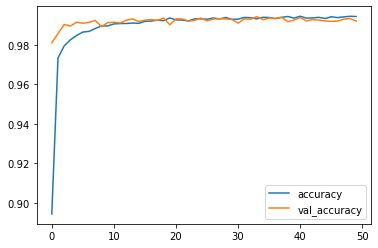

In [21]:
history_frame.loc[:,['loss','val_loss']].plot()
history_frame.loc[:,['accuracy','val_accuracy']].plot()

In [25]:
model.evaluate(X_train,y_train)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0056 - accuracy: 0.9980


[0.005570185836404562, 0.9980475902557373]

In [23]:
model.evaluate(X_valid,y_valid)

563/563 [==============================] - 2s 3ms/step - loss: 0.0548 - accuracy: 0.9919


[0.054817087948322296, 0.991944432258606]

In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0443 - accuracy: 0.9920


[0.044317953288555145, 0.9919999837875366]